In [1]:
import uproot
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep

In [2]:
f_mumu = uproot.open("/work/submit/jaeyserm/fccee/FCCAnalyzer/output_tagger.root")
print(f_mumu.keys())

['wzp6_ee_ccH_Hbb_ecm240;1', 'wzp6_ee_ccH_Hbb_ecm240/jet_p;1', 'wzp6_ee_ccH_Hbb_ecm240/jet_nconst;1', 'wzp6_ee_ccH_Hbb_ecm240/recojet_isC_jet0;1', 'wzp6_ee_ccH_Hbb_ecm240/recojet_isC_jet1;1', 'wzp6_ee_ccH_Hbb_ecm240/recojet_isC_jet2;1', 'wzp6_ee_ccH_Hbb_ecm240/recojet_isC_jet3;1', 'wzp6_ee_ccH_Hbb_ecm240/recojet_isB_jet0;1', 'wzp6_ee_ccH_Hbb_ecm240/recojet_isB_jet1;1', 'wzp6_ee_ccH_Hbb_ecm240/recojet_isB_jet2;1', 'wzp6_ee_ccH_Hbb_ecm240/recojet_isB_jet3;1', 'wzp6_ee_ccH_Hbb_ecm240/dijet_higgs_m_reco;1', 'wzp6_ee_ccH_Hbb_ecm240/dijet_z_m_reco;1', 'wzp6_ee_ccH_Hbb_ecm240/dijet_higgs_m_mc;1', 'wzp6_ee_ccH_Hbb_ecm240/dijet_z_m_mc;1', 'wzp6_ee_ccH_Hbb_ecm240/meta;1']


The histograms are saved as `process_name/histogram_name`. We will now plot the Z peak after all the cuts (stored in `zll_m_cut4`) for the main `wzp6_ee_mumu_ecm91p2` process:

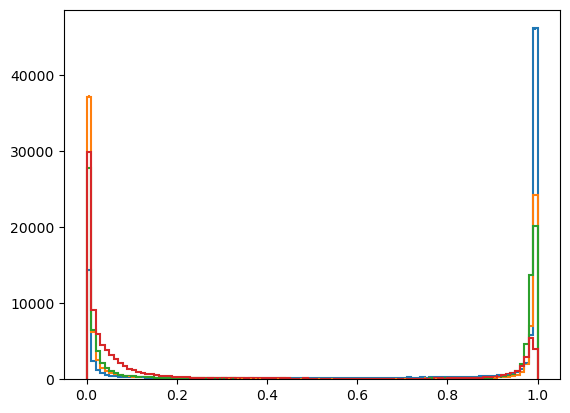

In [5]:
plots = [f_mumu[f'wzp6_ee_ccH_Hbb_ecm240/recojet_isB_jet{i}'] for i in range(4)] 
hep.histplot(plots)
plt.show()

To know the number of events in the histogram, we use the `.sum()` function. It returns an object containing two values: `.value` and `.variance`.

In [5]:
n_events_mumu = z_mumu.sum()
print("Total number of events:",n_events_mumu.value)

Total number of events: 247095362270.862


Let's get some backgrounds as well, for now we'll consider tau (`wzp6_ee_tautau_ecm91p2`) and the hadronic final states (`wzp6_ee_qq_ecm91p2`):

In [6]:
z_tautau = f_mumu['wzp6_ee_tautau_ecm91p2/zll_m_cut4'].to_hist()
z_tautau = z_tautau[::2j]
z_qq = f_mumu['wzp6_ee_qq_ecm91p2/zll_m_cut4'].to_hist()
z_qq = z_qq[::2j]

And let's plot them stacked:

/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


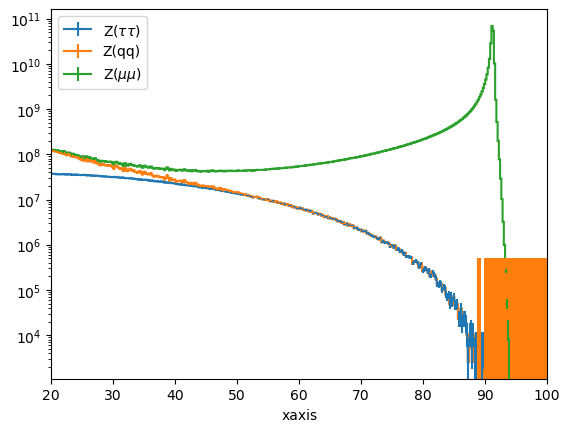

In [7]:
hep.histplot([z_tautau, z_qq, z_mumu], label=[r'Z($\tau\tau$)', r'Z(qq)', r'Z($\mu\mu$)'], stack=True)
plt.legend()
plt.xlim(20,100)
plt.yscale("log")

Now let's plot the Z peak for the different decay modes (di-muon, di-electron and hadronic):

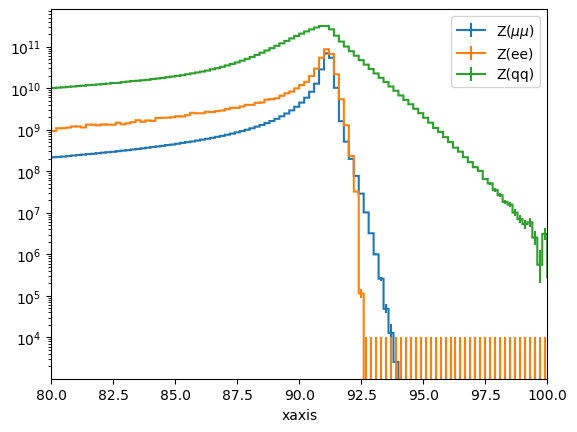

In [8]:
f_ee = uproot.open("/work/submit/jaeyserm/fccee/FCCAnalyzer/output_z_xsec_ee.root")
f_qq = uproot.open("/work/submit/jaeyserm/fccee/FCCAnalyzer/output_z_xsec_qq.root")
z_ee = f_ee['wzp6_ee_ee_Mee_5_150_ecm91p2/zll_m_cut4'].to_hist()
z_ee = z_ee[::2j]
z_qq = f_qq['wzp6_ee_qq_ecm91p2/dijet_m'].to_hist()
z_qq = z_qq[::2j]
hep.histplot([z_mumu, z_ee, z_qq], label=[r'Z($\mu\mu$)', r'Z(ee)', r'Z(qq)'])
#hep.histplot([z_qq], label=[r'Z(qq)'])
plt.legend()
plt.xlim(80,100)
plt.yscale("log")